1. 라이브러리 추가

In [2]:
# 데이터 분석에 필요한 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글이 깨지지 않게 추가한 코드
plt.rc('font',family='Malgun Gothic')

2. 데이터 불러오기 및 정제

In [3]:
subway_filepath='./서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv'
subway_file=pd.read_csv(subway_filepath,index_col='사용월',encoding='CP949')
subway_data=subway_file.iloc[:,:-5]
#print(subway_data.head())

# 시간대별 데이터
data_time=subway_data.iloc[:,1:].set_index('지하철역')
#print(data_time)

# 시간대별 승차인원 데이터
data_get_on=subway_data.iloc[:,2::2]
#print(data_get_on)

# 시간대별 하차인원 데이터
data_get_off=subway_data.iloc[:,3::2]
#print(data_get_off)

# 시간대별 총 인원 데이터
def sum_all(row):
    for i in range(0,len(data_time.columns),2):
        row[f'{int(i/2)+4}-{int(i/2)+5}시 총 인원'] = row[i]+row[i+1]
    return row

data_all=data_time.apply(sum_all,axis=1).iloc[:,len(data_time.columns):]

# 역별 총 인원 평균 데이터
data_station=data_all.iloc[:,0:].groupby('지하철역').mean()

# 역별 승차 인원
get_on_station=data_time.iloc[:,::2].groupby('지하철역').mean()

# 역별 하차 인원
get_off_station=data_time.iloc[:,1::2].groupby('지하철역').mean()

# 월별 총 이용량
data_month=subway_data.groupby('사용월').sum().iloc[:,2:].sum(axis=1)

# 노선별 이용량
data_line=subway_data.groupby('호선명').sum().iloc[:,1:].sum(axis=1)

3. 데이터 시각화

3-1. 시간대별 이용량

Text(0.5, 1.0, '시간대별 이용량')

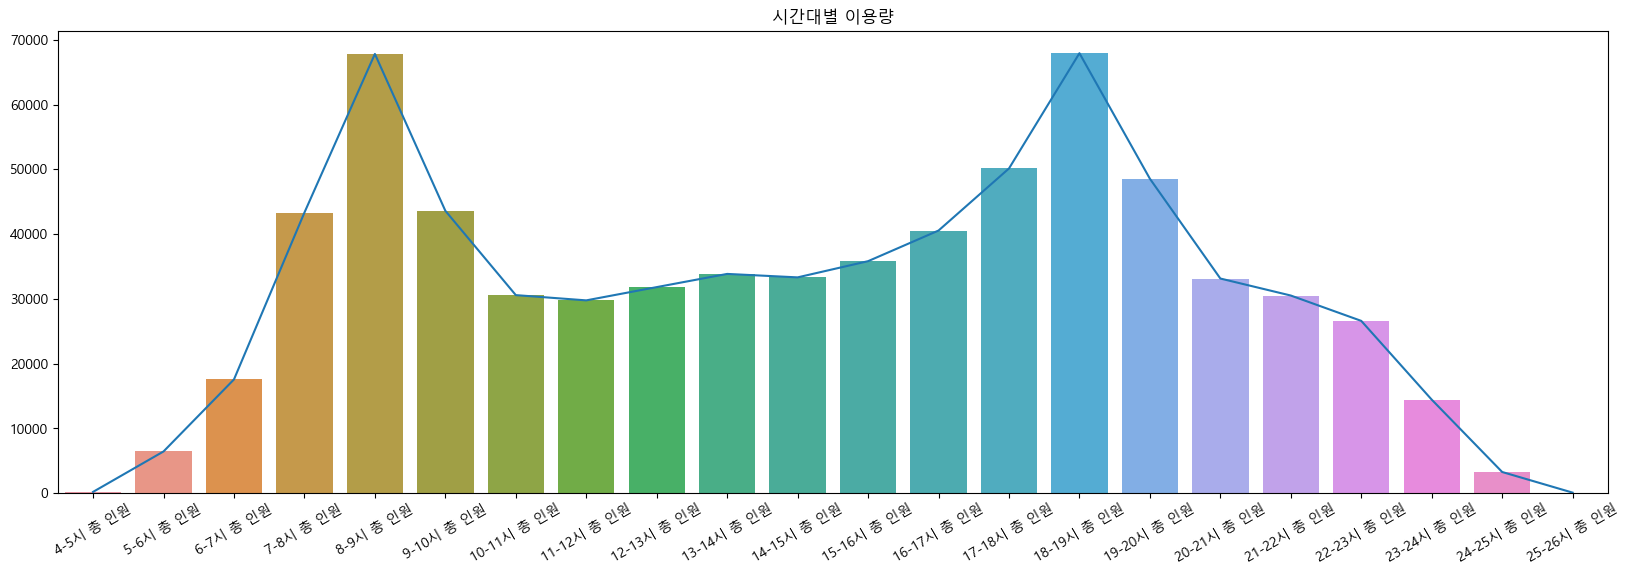

In [4]:
# 시간대별 승차인원 평균
plt.figure(figsize=(20,6))
sns.lineplot(data=data_all.mean())
sns.barplot(x=data_all.columns,y=data_all.mean())
plt.xticks(rotation=30)
plt.title('시간대별 이용량')

출퇴근 시간대인 8-9시, 18-19시 이용량이 가장 많음

3-2. 지하철역당 이용량

출근 시간 이용량 그래프

Text(0.5, 1.0, '8-9시 이용량')

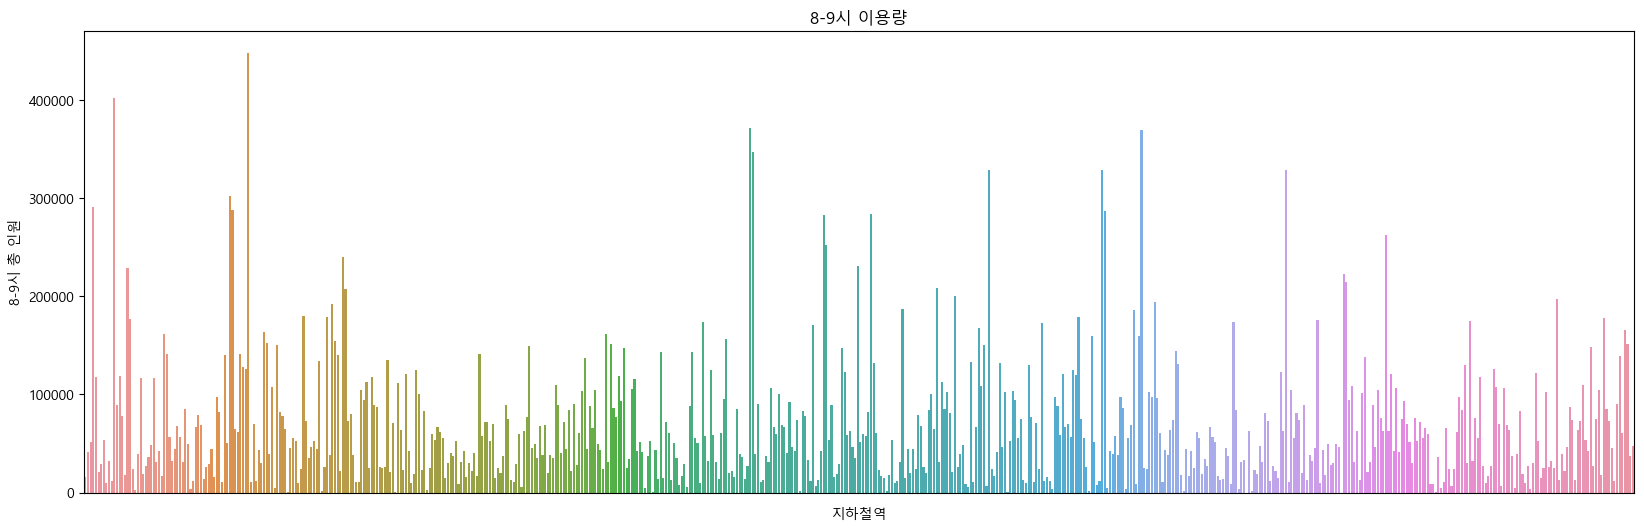

In [5]:
plt.figure(figsize=(20,6))
s1=sns.barplot(x=data_station.index,y=data_station.loc[:,'8-9시 총 인원'])
s1.set(xticklabels=[])
s1.tick_params(bottom=False)
plt.title('8-9시 이용량')

In [14]:
data_station.loc[:,['8-9시 총 인원']].sort_values(by="8-9시 총 인원",ascending=False).round(2).head(3)

,8-9시 총 인원
지하철역,
구로디지털단지,448111.80
강남,402142.86
삼성,371576.71


총 이용량중 승하차량 비교

In [15]:
# 출근시간 승차량이 제일 많은 역
get_on_station.loc[:,['08시-09시 승차인원']].sort_values(by="08시-09시 승차인원",ascending=False).round(2).head(3)

,08시-09시 승차인원
지하철역,
신림,273688.73
서울대입구,198168.95
구로디지털단지,189706.69


In [17]:
# 출근시간 하차량이 제일 많은 역
get_off_station.loc[:,['08시-09시 하차인원']].sort_values(by="08시-09시 하차인원",ascending=False).round(2).head(3)

,08시-09시 하차인원
지하철역,
역삼,342721.07
삼성,339624.05
강남,331398.61


퇴근시간 이용량 그래프

Text(0.5, 1.0, '18-19시 이용량')

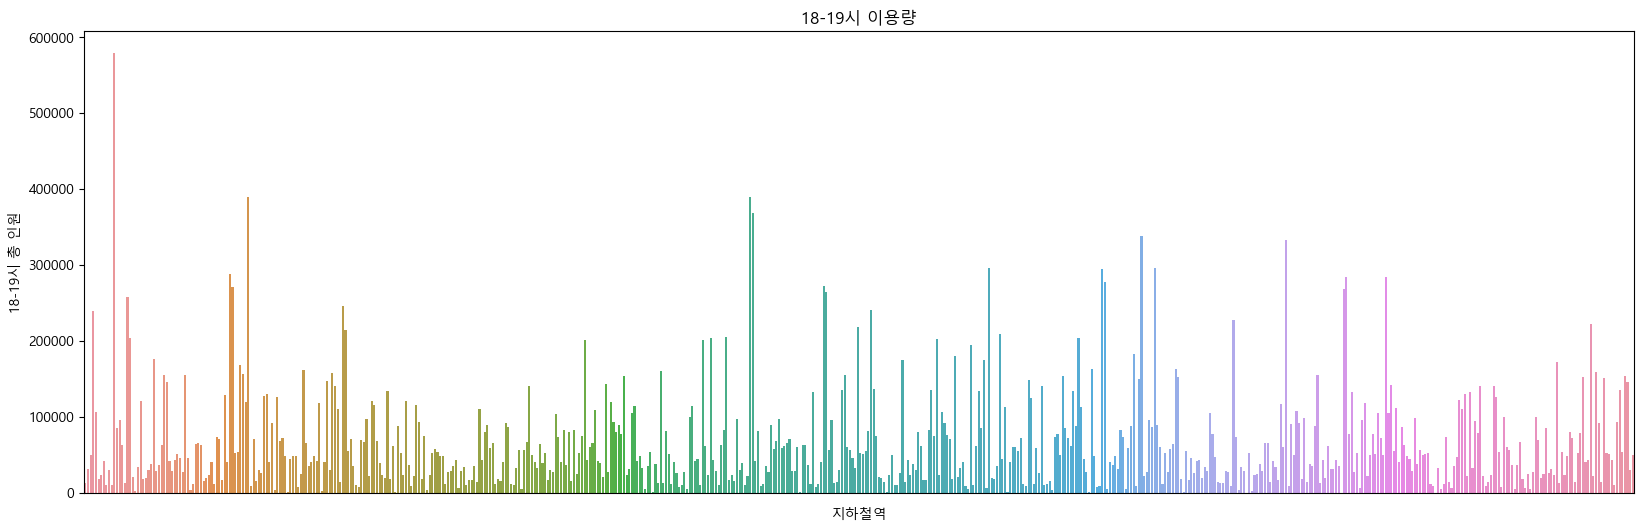

In [200]:
plt.figure(figsize=(20,6))
s2=sns.barplot(x=data_station.index,y=data_station.loc[:,'18-19시 총 인원'])
s2.set(xticklabels=[])
s2.tick_params(bottom=False)
plt.title('18-19시 이용량')

In [18]:
data_station.loc[:,['18-19시 총 인원']].sort_values(by="18-19시 총 인원",ascending=False).round(2).head(3)

,18-19시 총 인원
지하철역,
강남,579169.46
구로디지털단지,389132.80
삼성,388720.48


총 이용량중 승하차량 비교

In [19]:
# 퇴근시간 승차량이 제일 많은 역
get_on_station.loc[:,['18시-19시 승차인원']].sort_values(by="18시-19시 승차인원",ascending=False).round(2).head(3)

,18시-19시 승차인원
지하철역,
강남,352441.54
삼성,299820.67
삼성(무역센터),296702.62


In [20]:
# 퇴근시간 하차량이 제일 많은 역
get_off_station.loc[:,['18시-19시 하차인원']].sort_values(by="18시-19시 하차인원",ascending=False).round(2).head(3)

,18시-19시 하차인원
지하철역,
강남,226727.92
신림,208044.91
서울대입구(관악구청),165768.31


3-3. 월별 통계량 분석

Text(0.5, 1.0, '월별 총 이용량')

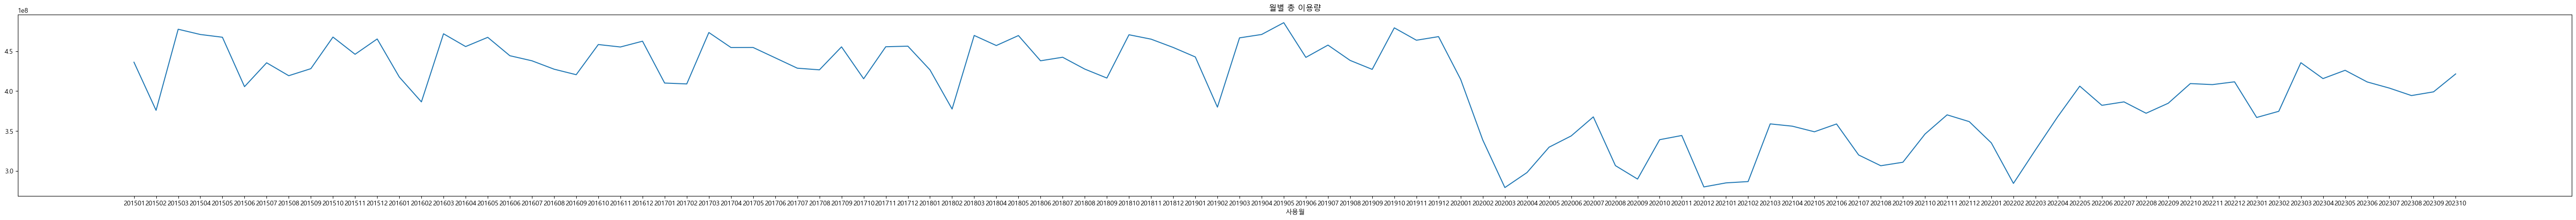

In [248]:
# 월병 총 이용량 그래프
plt.figure(figsize=(70,5))#70
sns.lineplot(x=data_month.index.astype(str),y=data_month)
plt.title("월별 총 이용량")

Text(0.5, 1.0, '월별 총 이용량')

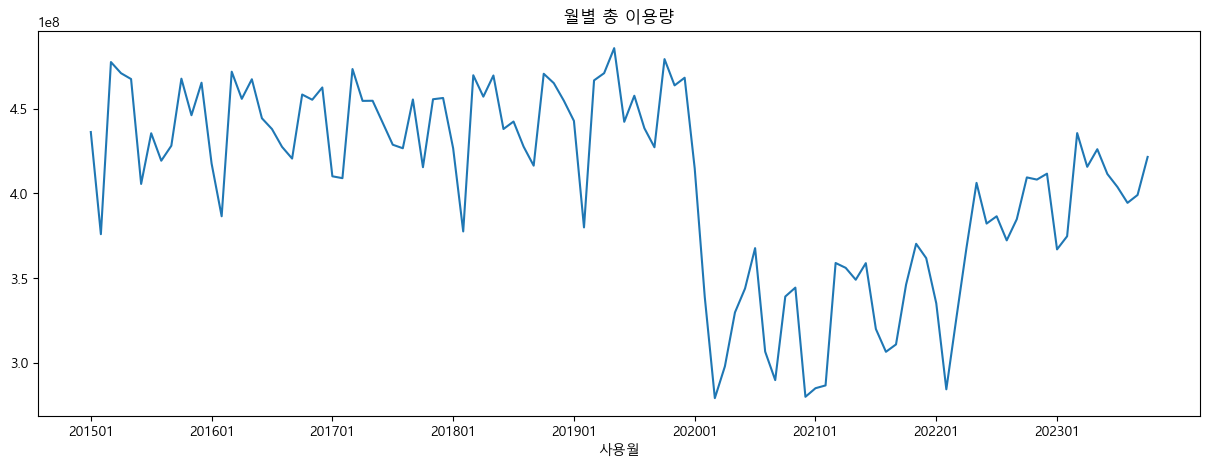

In [33]:
plt.figure(figsize=(15,5))#70
sns.lineplot(x=data_month.index.astype(str),y=data_month)
month=[]
for i in range(0,len(data_month.index),12):
    month.append(str(data_month.index[i]))
plt.xticks(month)
plt.title("월별 총 이용량")

Text(0.5, 1.0, '월별 총 이용량')

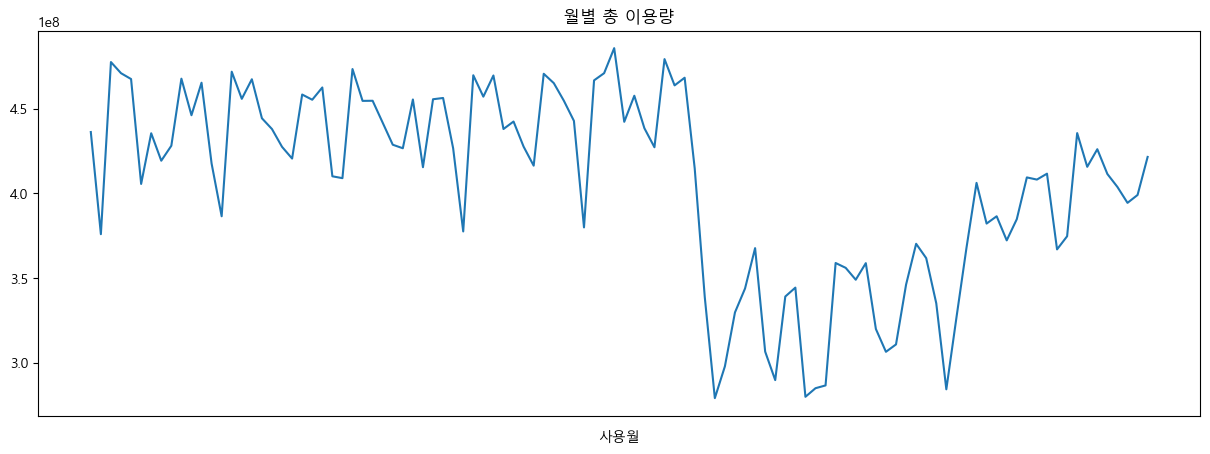

In [30]:
# 월병 총 이용량 그래프
plt.figure(figsize=(15,5))#70
s3=sns.lineplot(x=data_month.index.astype(str),y=data_month)
s3.set(xticklabels=[])
s3.tick_params(bottom=False)
plt.title("월별 총 이용량")

3-4. 이용량이 가장 많은 노선 분석

Text(0.5, 1.0, '노선별 이용량')

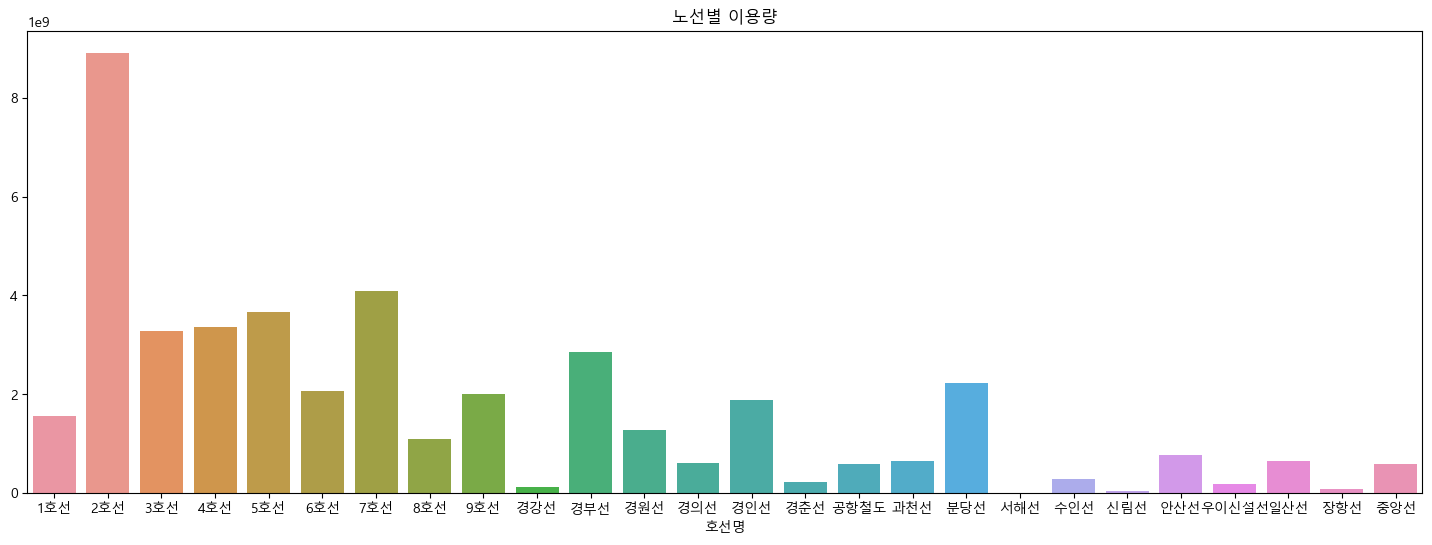

In [189]:
plt.figure(figsize=(18,6))
sns.barplot(x=data_line.index,y=data_line)
plt.title('노선별 이용량')

[3.6256284816665603, 20.670562849512887, 7.607347533911675, 7.78851309093152, 8.496183833681489, 4.783900786105129, 9.50957626221764, 2.537122411641813, 4.65584860379976, 0.3066595177566625, 6.647112295922035, 2.960503130020115, 1.429059601344921, 4.37629035270731, 0.5386078376602089, 1.3869628304156918, 1.4909318087009473, 5.166704035227428, 0.004963637860186032, 0.6628662504290153, 0.09070811300572892, 1.7834757646189365, 0.412046361603464, 1.5068938680295594, 0.21098181521701695, 1.3505489260123011]


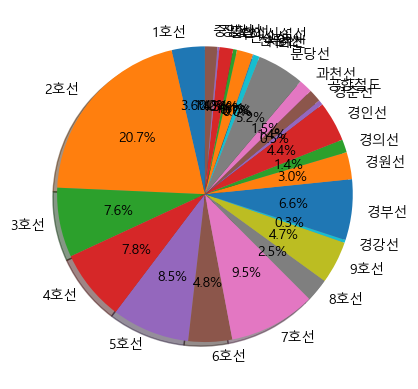

In [215]:
labels = data_line.index
sizes=[]
data_line_sum=data_line.sum()
for i in range(len(data_line)):
    sizes.append((data_line[i]/data_line_sum)*100)
print(sizes)
wedgeprops={'width':1}


plt.pie(sizes,labels=labels,autopct='%.1f%%',wedgeprops=wedgeprops,startangle=90,shadow=True)
plt.show()

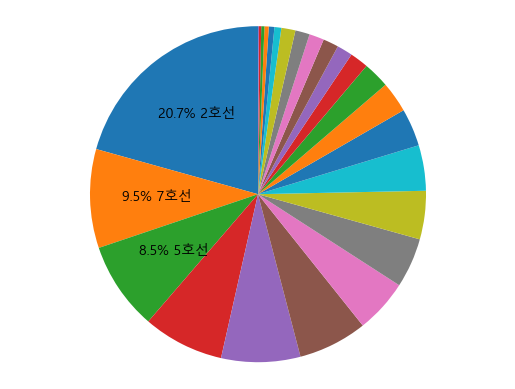

In [42]:
pie_data=data_line.sort_values(ascending=False)
labels = pie_data.index
sizes=[]
pie_data_sum=pie_data.sum()
for i in range(len(pie_data)):
    sizes.append((pie_data[i]/pie_data_sum)*100)

# 원하는 값의 인덱스
val=pie_data.idxmax()
desired_index = pie_data.index.get_loc(val)

# 차트 생성
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, labels=None, autopct='', startangle=90)

# 원하는 값에 대한 레이블 표시
autotexts[desired_index].set_text(f'{sizes[desired_index]:.1f}% {labels[desired_index]}')
autotexts[1].set_text(f'{sizes[1]:.1f}% {labels[1]}')
autotexts[2].set_text(f'{sizes[2]:.1f}% {labels[2]}')
plt.axis('equal')  # 원형 차트를 원형으로 유지
plt.show()